## From Neil Lawrence

In [3]:
import zipfile
import urllib
import pandas as pd

In [4]:
admin_zones_url = 'https://data.humdata.org/dataset/81ac1d38-f603-4a98-804d-325c658599a3/resource/0bc2f7bb-9ff6-40db-a569-1989b8ffd3bc/download/nga_admbnda_osgof_eha_itos.gdb.zip'
_, msg = urllib.request.urlretrieve(admin_zones_url, 'nga_admbnda_osgof_eha_itos.gdb.zip')
with zipfile.ZipFile('nga_admbnda_osgof_eha_itos.gdb.zip', 'r') as zip_ref:
    zip_ref.extractall('nga_admbnda_osgof_eha_itos.gdb')

In [5]:
import fiona
import geopandas as gpd

<AxesSubplot:>

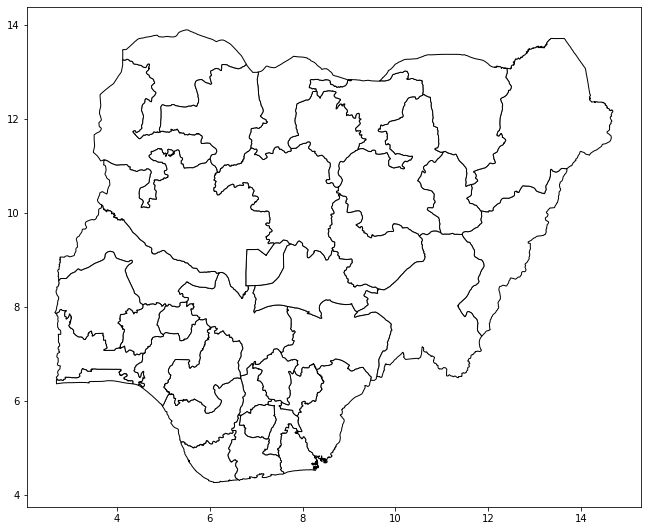

In [6]:
states_file = "nga_admbnda_osgof_eha_itos.gdb/nga_admbnda_osgof_eha_itos.gdb/nga_admbnda_osgof_eha_itos.gdb/nga_admbnda_osgof_eha_itos.gdb/"

# geopandas included map, filtered to just Nigeria
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.crs = "EPSG:4326"
nigeria = world[(world['name'] == 'Nigeria')]
base = nigeria.plot(color='white', edgecolor='black', alpha=0, figsize=(11, 11))

layers = fiona.listlayers(states_file)
zones_gdf = gpd.read_file(states_file, layer=1)
zones_gdf.crs = "EPSG:4326"
zones_gdf = zones_gdf.set_index('admin1Name_en')
zones_gdf.plot(ax=base, color='white', edgecolor='black')

In [7]:
import pandas as pd


covid_data_url = 'https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/line_lists/line-list-nigeria.csv'
covid_data_csv = 'cases.csv'
urllib.request.urlretrieve(covid_data_url, covid_data_csv)
covid_data = pd.read_csv(covid_data_csv)

In [9]:
pop_url = 'https://data.humdata.org/dataset/a7c3de5e-ff27-4746-99cd-05f2ad9b1066/resource/d9fc551a-b5e4-4bed-9d0d-b047b6961817/download/nga_pop_adm1_2016.csv'
_, msg = urllib.request.urlretrieve(pop_url,'nga_pop_adm1_2016.csv')
pop_data = pd.read_csv('nga_pop_adm1_2016.csv')

In [10]:
pop_data.columns = ['admin1Name_en', 'admin1Pcode', 'admin0Name_en', 'admin0Pcode', 'population']
pop_data = pop_data.set_index('admin1Name_en')

In [11]:
pop_joined = zones_gdf.join(pop_data['population'], how='inner')

In [12]:
covid_cases_by_state = covid_data.groupby(['province/state']).count()['case_id']

In [13]:
pop_joined['covid_cases_by_state'] = covid_cases_by_state

## Get in my data from pdfs

In [14]:
# get the giant df that was made from pdfs

import pandas as pd

giant_df = pd.read_csv('20200502_20200817_pdfs.csv')

# clean the index
giant_df.reset_index(drop=True)
giant_df.drop(giant_df.columns[0], axis=1, inplace=True)


# manual fixing of some rows
giant_df.iloc[1412,:] = 'Akwa Ibom', 48, 3, 17, 3, 2, 0, 29, '2020-06-13'
giant_df.iloc[2957,:] = 'FCT', 3560, 35, 1077, 13, 41, 0, 2442, '2020-07-28'
giant_df.iloc[2984,:] = 'Sokoto', 154, 0, 137, 90, 16, 0, 1, '2020-07-28'

giant_df.iloc[1494,:] = 'Lagos', 7461, 142, 1302, 165, 107, 25, 6052, '2020-06-16'
giant_df.iloc[2436,:] = 'Lagos', 12711, 128, 1935, 19, 175, 2, 10601, '2020-07-14'
giant_df.iloc[3550,:] = 'Lagos', 16369, 113, 14457, 1325, 201, 0, 1711, '2020-08-14'
giant_df.iloc[3587,:] = 'Lagos', 16456, 87, 14467, 10, 201, 0, 1788, '2020-08-15'
giant_df.loc[2771, 'new_deaths'] = 15



# convert date from string to date format
giant_df['date']= giant_df['date'].astype('datetime64[ns]')

# check information
giant_df.info()


# most entries are strings => convert into numeric

import numpy as np

for i in [1,2,3,5,6,7]:
    # print(i)
    giant_df.iloc[:,i] = giant_df.iloc[:,i].apply(lambda x: ''.join(ch for ch in str(x) if ch.isdigit()))
    giant_df.iloc[:,i] = pd.to_numeric(giant_df.iloc[:,i])
    # sub_df.iloc[:,i] = sub_df.iloc[:,i].apply(lambda x: int(x) if x else 'missing')
    
giant_df.info()
# why are total confirmed and new_confirmed floats ??



# fix state names
giant_df['state'] = giant_df['state'].apply(lambda x: 'Federal Capital Territory' if x == 'FCT' else x)
giant_df['state'] = giant_df['state'].apply(lambda x: 'Akwa Ibom' if x.startswith('Akwa') else x)
# giant_df['state'] = giant_df['state'].apply(lambda x: 'Cross River' if x == 'River' else x)
giant_df['state'] = giant_df['state'].apply(lambda x: 'Cross River' if x == 'Cross Rivers' else x)
giant_df = giant_df[giant_df['state'] != 'Ibom']


# save as a beatiful new csv
giant_df.to_csv('giant_df_nigeria.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   state             3735 non-null   object        
 1   total_confirmed   3735 non-null   object        
 2   new_confirmed     3735 non-null   object        
 3   total_discharged  3735 non-null   object        
 4   new_dicharged     3735 non-null   int64         
 5   total_deaths      3735 non-null   object        
 6   new_deaths        3735 non-null   object        
 7   total_active      3735 non-null   object        
 8   date              3735 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 262.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   state     

In [15]:
# get a list of dates - useful for iterating through them later

date_list = giant_df['date'].unique().tolist()
display(len(date_list))

# sort the list alphabetically - this just puts 2020-07-07 in its place
date_list = sorted(date_list)
# display(date_list)

# rev_date_list = sorted(date_list, reverse=True)
# print(rev_date_list)

103

In [16]:
# split into separate df's by date
# create a list of df's, ordered by date
# within each df, order rows by state alphabetically

groups = giant_df.groupby('date')

df_list = []
for date in date_list:
    df = groups.get_group(date)
    
    # within each df, order rows alphabetically by state
    df.sort_values(by=['state'], inplace=True)
            
    # make state the index, so we can merge with geo data
    df.set_index('state', drop=False, inplace=True)
    
    df.index.names = ['admin1Name_en']
    
    # merge with geo data
    df = zones_gdf.join(df, how='inner', on="admin1Name_en", rsuffix='right')
    
    
    df_list.append(df)
print(len(df_list))


<ipython-input-16-f4513878aee8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['state'], inplace=True)


103


## Join my pdf data to pop_joined

In [20]:
# wrong
# pop_joined_pdf = test_df.merge(pop_joined, how="right", left_on="admin1Name_en", right_on="admin1Name_en")

# if you only want a column
# pop_joined_pdf = zones_gdf.join(test_df['new_confirmed'], how='inner')

# join df's

df = giant_df.copy()

df.set_index('state', drop=False, inplace=True)
df.index.names = ['admin1Name_en']
pop_joined_df = zones_gdf.join(df, how='inner', on="admin1Name_en", lsuffix='left')

# save
pop_joined_df.to_csv('giant_df_states.csv')

# len(pop_joined_pdf)
# pop_joined_pdf.columns
# type(pop_joined_pdf)

## Plot - no scrolling, plain matlab

Text(0.5, 1.0, 'New confirmed cases')

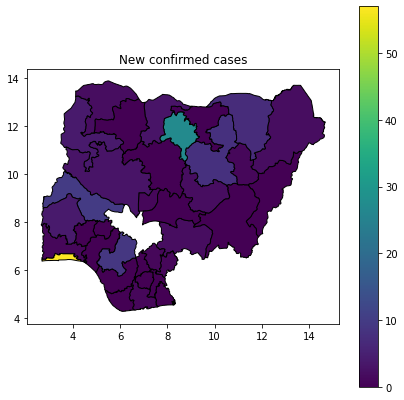

In [19]:
# Basic geopandas plot

curr_pos = 10

base = nigeria.plot(color='white', edgecolor='black', alpha=0, figsize=(7, 7))
df_list[curr_pos].plot(column='new_confirmed', ax=base, edgecolor='black', legend=True)
base.set_title("New confirmed cases")


# also works:
# variable = 'population'
# pop_joined.plot(variable, ax=base, edgecolor='black', legend=True)

In [ ]:
# plot total cases per state, scroll over time

import numpy as np
import matplotlib.pyplot as plt

# enables interactive plot in jupyter
%matplotlib notebook

# # now the real code :)
# # ie setting up scrolling

curr_pos = 0

# def key_event(e):
#     global curr_pos

#     #if e.key == "right":
#     if e.button == 'up':
#         curr_pos = curr_pos + 1
        
#     #elif e.key == "left":
#     elif e.button == 'down':
#         curr_pos = curr_pos - 1
#     else:
#         return
#     curr_pos = curr_pos % len(plots)

#     # clear the current axes, apparently
#     ax.cla()
    
#     # your plot
#     base = nigeria.plot(color='white', edgecolor='black', alpha=0, figsize=(11, 11))
#     df_list[curr_pos].plot(column='new_confirmed', ax=base, edgecolor='black', legend=True)
#     base.set_title("New confirmed cases")
    
#     fig.canvas.draw()
#     fig = plt.figure()

    
# need to look into what exactly each one of these does
# fig = plt.figure()


# your starting plot
base = nigeria.plot(color='white', edgecolor='black', alpha=0, figsize=(7, 7))
df_list[curr_pos].plot(column='new_confirmed', ax=base, edgecolor='black', legend=True)
base.set_title("New confirmed cases")



# fig.canvas.mpl_connect('scroll_event', key_event)
# ax = fig.add_subplot(111)




# show plot
plt.show()

## Try bokeh for scrolling

In [ ]:
# %conda install -c bokeh bokeh

In [ ]:
# make one giant df with all dates, merged with geo data

giant_geo = giant_df.copy()

# make state the index, so we can merge with geo data
giant_geo.set_index('state', drop=False, inplace=True)

giant_geo.index.names = ['admin1Name_en']

# merge with geo data
giant_geo = zones_gdf.join(giant_geo, how='inner', on="admin1Name_en", rsuffix='right')

# don't show h/min/s for date, just the y/m/d
giant_geo['date'] = pd.to_datetime(giant_geo['date']).dt.normalize()

giant_geo.sample(5)

## This isn't right, info below. Basically, can't use slider.on_change(), need to use js

In [ ]:
## Warning
# WARNING:bokeh.embed.util:
# You are generating standalone HTML/JS output, but trying to use real Python
# callbacks (i.e. with on_change or on_event). This combination cannot work.

# Only JavaScript callbacks may be used with standalone output. For more
# information on JavaScript callbacks with Bokeh, see:

#     https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

# Alternatively, to use real Python callbacks, a Bokeh server application may
# be used. For more information on building and running Bokeh applications, see:

#     https://docs.bokeh.org/en/latest/docs/user_guide/server.html


## Code
# from bokeh.io import curdoc
# from bokeh.layouts import column
# from bokeh. models import ColumnDataSource, Slider
# from bokeh.plotting import figure
# from numpy.random import random

# N = 300
# source = ColumnDataSource(data={'x': random(N), 'y': random(N)})
# # Create plots and widgets
# plot = figure()
# plot.circle(x='x', y='y', source=source)
# slider = Slider(start=100, end=1000, value=N, step=10, title='Number of points')

# # Add callback to widgets
# def callback(attr, old, new):  
#     N = slider.value
#     source.data={'x': random(N), 'y': random(N)}

# slider.on_change('value', callback)
    
# # Arrange plots and widgets in layouts
# layout = column(slider, plot)
# # curdoc().add_root(layout)

# show(layout)

## Basic slider example with js from bokeh

In [ ]:
# just the slider from bokeh
# https://docs.bokeh.org/en/latest/docs/user_guide/interaction/widgets.html#slider

from bokeh.io import show
from bokeh.models import CustomJS, Slider

slider = Slider(start=0, end=10, value=1, step=.1, title="Stuff")
slider.js_on_change("value", CustomJS(code="""
    console.log('slider: value=' + this.value, this.toString())
"""))

show(slider)

In [ ]:
# slider with graph from bokeh
# https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import Figure, output_file, show

output_file("js_on_change.html")

x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = Figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var f = cb_obj.value
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    source.change.emit();
""")

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power")
slider.js_on_change('value', callback)

layout = column(slider, plot)

show(layout)